# CS3892 - Projects in Autonomous Vehicles and Traffic
Author: George Gunter, Dan Work<br>
Copyright (c) 2024 Vanderbilt University

## Import relevant libraries:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Define the CFM to be used:

In [7]:
# Define the Constant Time Gap (CTG) model acceleration function
def CTH_accel(v, s, delta_v, alpha=1, tau=1):
    """
    Follows the constant time-gap car-following model.
    
    Parameters:
    - v: Speed of the following vehicle (ego).
    - s: Spacing between the ego and lead vehicles.
    - delta_v: Speed difference between the lead and ego vehicles.
    - alpha: Acceleration gain parameter.
    - tau: Desired time-gap.
    
    Returns:
    - Calculated acceleration for the ego vehicle.
    """
    return alpha * (s - v * tau)

## Define things needed for simulation:

Text(0.5, 0, 'Time [s]')

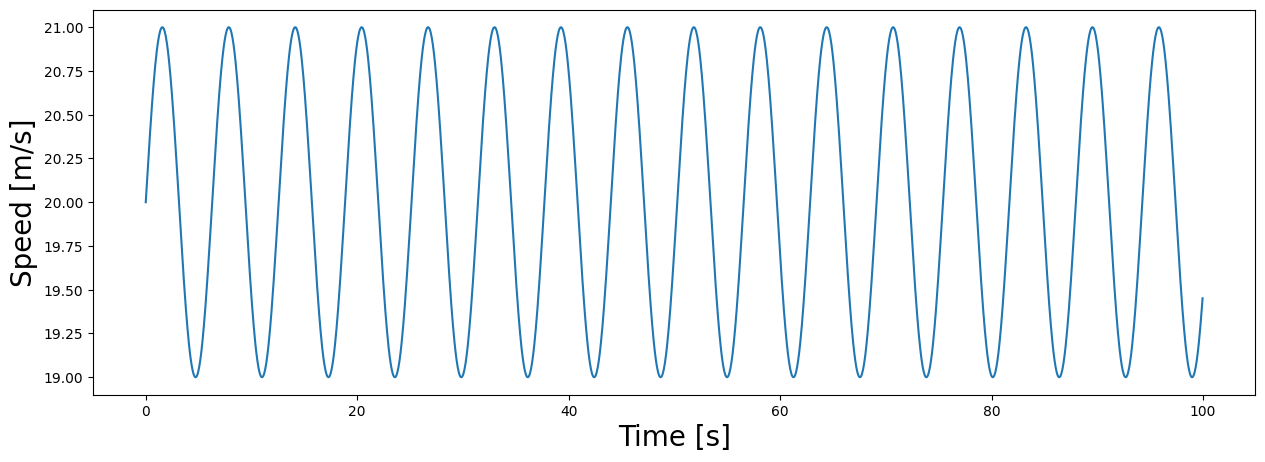

In [8]:
dt = 0.05 #Simulation fidelity
t_final = 100.0 #simulation duration
t = np.arange(0,t_final,dt) #time values
K = len(t) # number of simulation steps

v_l_values = np.sin(t) + 20.0 # the lead vehicle oscilates around 20 m/s

plt.figure(figsize=[15,5])
plt.plot(t,v_l_values)
plt.ylabel('Speed [m/s]',fontsize=20)
plt.xlabel('Time [s]',fontsize=20)

In [9]:
s_values = [] # where we'll store spacing values
v_values = [] # speed values
delta_v_values = [] # speed differences values

# INITIAL CONDITIONS:
s_0 = 10.0 # begin at the desired time-gap
v_0 = 20.0 # begin at the same following speed as the leader
delta_v_0 = v_l_values[0] - v_0


s_values.append(s_0) # store as first values
v_values.append(v_0)
delta_v_values.append(delta_v_0)

# Run through numerical simulation:

In [10]:
for k in range(1,K):# Have already accounted for k = 0, start with k = 1
    
    
    # At every iteration, look at what the last value we calculated was:
    s_t_k = s_values[-1] 
    v_t_k = v_values[-1]
    delta_v_t_k = v_l_values[k-1] - v_t_k
    
    # apply the Euler finite-difference integration scheme:
    a_t_k = CTH_accel(v=v_t_k,s=s_t_k,delta_v=delta_v_t_k)
    
    # apply the update rule to find a new state:
    v_t_k_plus_1 = v_t_k + dt*a_t_k
    s_t_k_plus_1 = s_t_k + dt*delta_v_t_k
    
    # add newly calculated states to the recorded values:
    v_values.append(v_t_k_plus_1)
    s_values.append(s_t_k_plus_1)
    
    
print('Simulation finished.')

Simulation finished.


## Plot the results:

Text(0.5, 0, 'Time [s]')

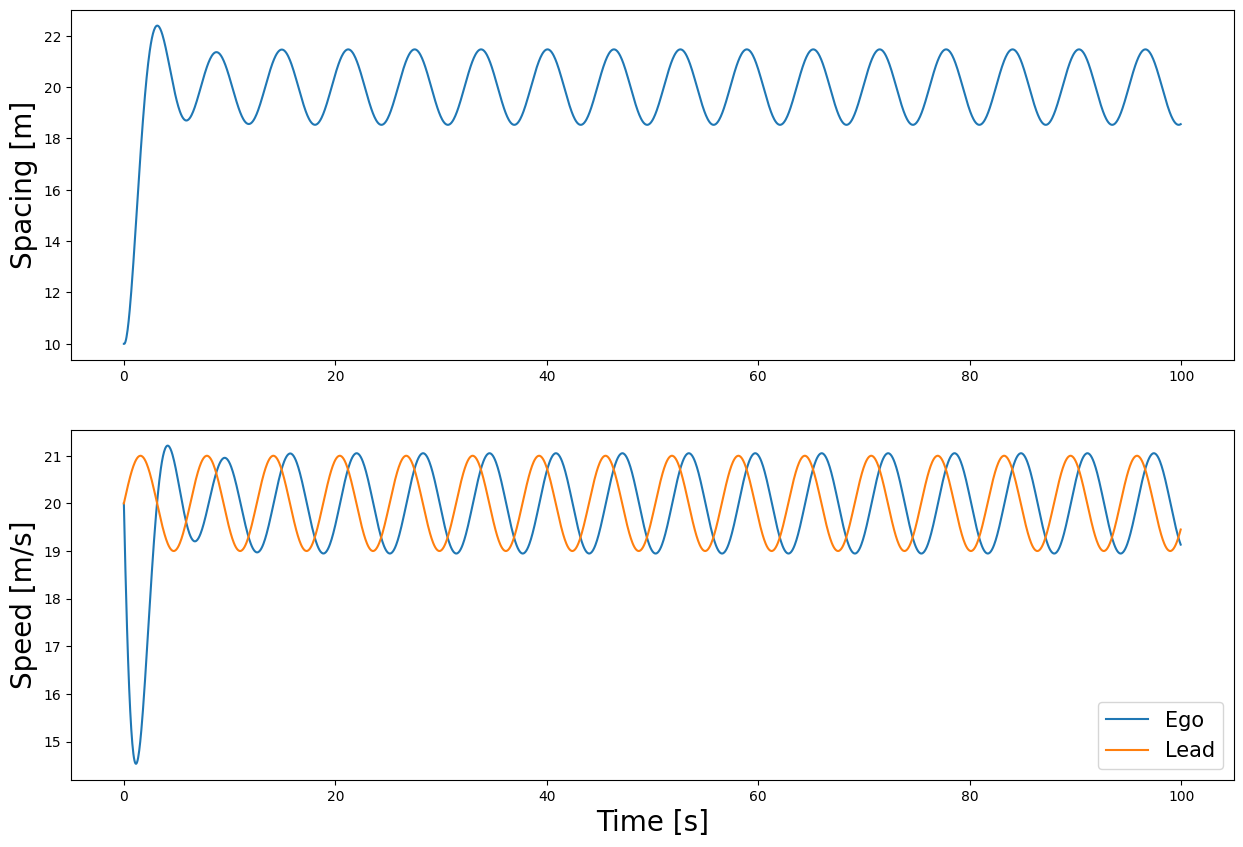

In [11]:
plt.figure(figsize=[15,10])

plt.subplot(2,1,1)
plt.plot(t,s_values)
plt.ylabel('Spacing [m]',fontsize=20)


plt.subplot(2,1,2)
plt.plot(t,v_values,label='Ego')
plt.plot(t,v_l_values,label='Lead')
plt.legend(fontsize=15)
plt.ylabel('Speed [m/s]',fontsize=20)
plt.xlabel('Time [s]',fontsize=20)



## Let's create a simulation function:

In [12]:
def CTH_accel(v,s,delta_v,alpha,tau):
    # follows the constant time-gap car-following model:
    return alpha*(s - v*tau)


def simulate_CTH(alpha,
                 tau,
                 v_l_values=np.sin(t) + 20.0):
    '''
    This function will perform the euler simulation
    using specified CFM parameters and a lead vehicle input profile
    '''

    # SIMULATION PARAMETERS:
    dt = 0.05 #Simulation fidelity
    t_final = 100.0 #simulation duration
    t = np.arange(0,t_final,dt) #time values
    K = len(t) # number of simulation steps
    
    # STATE VALUES:
    s_values = [] # where we'll store spacing values
    v_values = [] # speed values
    delta_v_values = [] # speed differences values

    # INITIAL CONDITIONS:
    s_0 = 10.0 # begin at the desired time-gap
    v_0 = 20.0 # begin at the same following speed as the leader
    delta_v_0 = v_l_values[0] - v_0


    s_values.append(s_0) # store as first values
    v_values.append(v_0)
    delta_v_values.append(delta_v_0)

    for k in range(1,K):# Have already accounted for k = 0, start with k = 1

        # At every iteration, look at what the last value we calculated was:
        s_t_k = s_values[-1] 
        v_t_k = v_values[-1]
        delta_v_t_k = v_l_values[k-1] - v_t_k

        # apply the Euler finite-difference integration scheme:
        a_t_k = CTH_accel(v=v_t_k,s=s_t_k,delta_v=delta_v_t_k,alpha=alpha,tau=tau)

        # apply the update rule to find a new state:
        v_t_k_plus_1 = v_t_k + dt*a_t_k
        s_t_k_plus_1 = s_t_k + dt*delta_v_t_k

        # add newly calculated states to the recorded values:
        v_values.append(v_t_k_plus_1)
        s_values.append(s_t_k_plus_1)
        
    print('simulation finsihed.')
        
    return [t,s_values,v_values,delta_v_values,v_l_values]


In [13]:
# Here's an example of to run that does the same simulation as previously:
[t,s_values,v_values,delta_v_values,v_l_values] = simulate_CTH(alpha=1.5,tau=0.5)

simulation finsihed.


## How does changing the parameters affect following behavior?

simulation finsihed.
simulation finsihed.
simulation finsihed.


(16.0, 22.0)

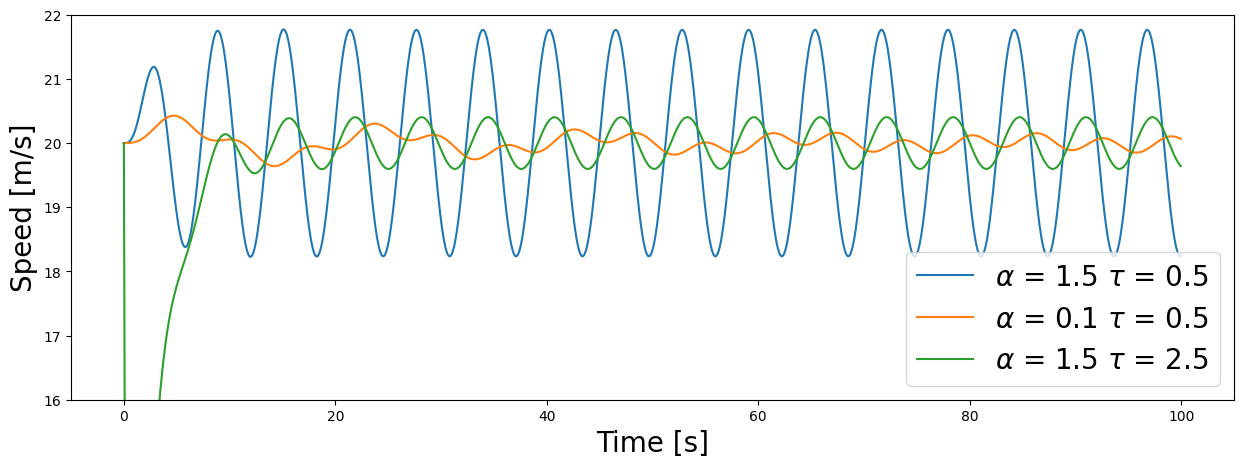

In [14]:
plt.figure(figsize=[15,5])

alpha = 1.5 # choose CFM parameters:
tau = 0.5

[t,s_values,v_values,delta_v_values,v_l_values] = simulate_CTH(alpha,tau) # run the simulation
plt.plot(t,v_values,label=r'$\alpha$ = '+str(alpha)+r' $\tau$ = '+str(tau))

alpha = 0.1 # choose CFM parameters:
tau = 0.5

[t,s_values,v_values,delta_v_values,v_l_values] = simulate_CTH(alpha,tau) # run the simulation
plt.plot(t,v_values,label=r'$\alpha$ = '+str(alpha)+r' $\tau$ = '+str(tau))


alpha = 1.5 # choose CFM parameters:
tau = 2.5

[t,s_values,v_values,delta_v_values,v_l_values] = simulate_CTH(alpha,tau) # run the simulation
plt.plot(t,v_values,label=r'$\alpha$ = '+str(alpha)+r' $\tau$ = '+str(tau))

plt.ylabel('Speed [m/s]',fontsize=20)
plt.xlabel('Time [s]',fontsize=20)
plt.legend(fontsize=20)
plt.ylim([16.0,22.0])

## Can use our simulation function to simulation strings of vehicles:

In [15]:
# we'll store the different measured speeds here:
all_v_values = []

# simulate the first follower:
[t,s_values,v_values,delta_v_values,v_l_values] = simulate_CTH(alpha=1.5,tau=0.5)
all_v_values.append(v_values)

num_following_vehicles = 5

for i in range(num_following_vehicles):
    v_l_values = v_values # use the last speed profile as the new lead input:
    [t,s_values,v_values,delta_v_values,v_l_values] = simulate_CTH(alpha=1.5,tau=0.5,v_l_values=v_l_values)
    all_v_values.append(v_values)
    

simulation finsihed.
simulation finsihed.
simulation finsihed.
simulation finsihed.
simulation finsihed.
simulation finsihed.


Text(0.5, 0, 'Time [s]')

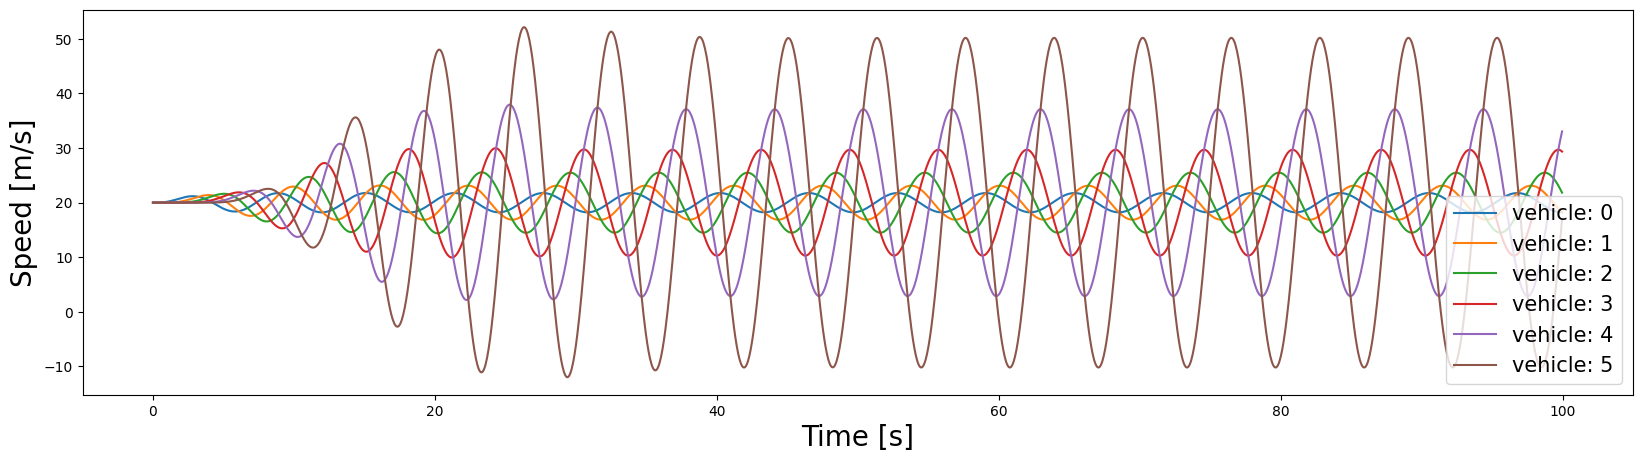

In [16]:
plt.figure(figsize=[20,5])

for i,v_values in enumerate(all_v_values):
    plt.plot(t,v_values,label='vehicle: '+str(i)) #label every fifth vehicle

plt.legend(fontsize=15)
plt.ylabel('Speed [m/s]',fontsize=20)
plt.xlabel('Time [s]',fontsize=20)

In [30]:
import math
# once more with the "magic" alpha and tau: t >= 2/(sqrt(alpha)
myalpha=1.5
mytau = 2/math.sqrt(myalpha) + 0.11


In [31]:
# we'll store the different measured speeds here:
all_v_values = []

# simulate the first follower:
[t,s_values,v_values,delta_v_values,v_l_values] = simulate_CTH(alpha=myalpha,tau=mytau)
all_v_values.append(v_values)

num_following_vehicles = 5

for i in range(num_following_vehicles):
    v_l_values = v_values # use the last speed profile as the new lead input:
    [t,s_values,v_values,delta_v_values,v_l_values] = simulate_CTH(alpha=myalpha,tau=mytau,v_l_values=v_l_values)
    all_v_values.append(v_values)
    

simulation finsihed.
simulation finsihed.
simulation finsihed.
simulation finsihed.
simulation finsihed.
simulation finsihed.


Text(0.5, 0, 'Time [s]')

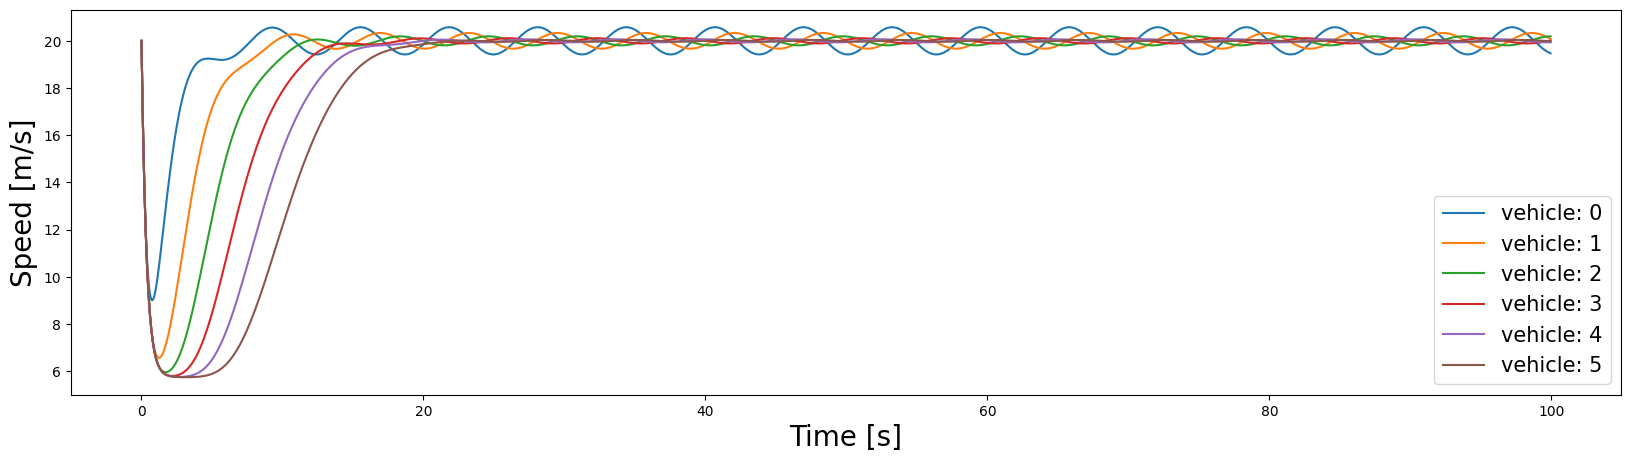

In [32]:
plt.figure(figsize=[20,5])

for i,v_values in enumerate(all_v_values):
    plt.plot(t,v_values,label='vehicle: '+str(i)) #label every fifth vehicle

plt.legend(fontsize=15)
plt.ylabel('Speed [m/s]',fontsize=20)
plt.xlabel('Time [s]',fontsize=20)